In [43]:
# pip install pandas

In [44]:
# pip install matplotlib

In [45]:
import math
import random
import matplotlib
import pandas as pd
import numpy as np

# Neopian Stock Market Simulation

## Algorithm for determining stock market price

### Pseudocode

### Real Code

In [46]:
def maxmove(currentprice): 
    if currentprice <= 100:
        maxmove = currentprice / 20
    elif currentprice > 100:
        maxmove = currentprice / 50
    elif currentprice > 500:
        maxmove = currentprice / 200
    elif currentprice > 1000:
        maxmove = currentprice / 400
    return float(math.ceil(maxmove))

In [47]:
# mylist = [*range(1,101)]
# mylist

# for item in mylist:
#     print(maxmove(item))

In [48]:
# Set variation to random between 1 and max move * 2 - 1. 
# Randomly add +1 to variation with 1/20 chance. 
# Randomly subtract 1 with 1/20 chance.

def variation(maxmove):
    variation = random.randint(1,maxmove*2-1)
    if random.randint(0,100) < 20: 
        variation += 1
    if random.randint(0,100) < 20:
        variation -=1
    return float(variation)

In [49]:
# mylist2 = [*range(1,6)]
# mylist2

# for item in mylist2:
#     print(variation(item))

In [50]:
# If current price >= 10 and current price / opening price > 1.15 
# substract max move / 4 rounded down from variation

# If current price >= 10 and current price / opening price > 1.3 
# substract max move / 4 rounded down from variation

def adjustment(currentprice, openingprice, maxmove, variation):
    if currentprice >= 10:
        if currentprice/openingprice > 1.15:
            variation -= math.floor(maxmove/4)
        if currentprice/openingprice > 1.3:
            variation -= math.floor(maxmove/4)
    
    # Set points to variation - max move rounded down
    points = math.floor(variation - maxmove)
    
    # Set p to min(current price * 10, 100)
    p = min(currentprice*10,100)
    
    # If points + current price > 5, change stock price 
    # to current price + points with p% chance
    if points + currentprice > 5:
        if random.randint(0,100) < p:
            return float(points)
   
    return 0

In [51]:
# adjustment(15,15,5,5)

In [52]:
# currentprice = 15
# openingprice = 15

def price_adjust(currentprice, openingprice):
    maxmove_x = maxmove(currentprice)
    variation_x = variation(maxmove_x)
    return adjustment(currentprice, openingprice, maxmove_x, variation_x)

# price_adjust(currentprice, openingprice)

## Simulation

In [66]:
# market updates every 30 minutes so 48 times a day
# run 1000 simulations of current price 15, opening price 15 for 365 days

Dict = {}
sims = 10 #1000

for k in range(sims): 
    data = []
    currentprice = 15
    for i in range(365):
        openingprice = currentprice
        for j in range(48):
            currentprice += price_adjust(currentprice, openingprice)
            data.append(int(currentprice))
    Dict[k] = data
    data = []
    currentprice = 15

df = pd.DataFrame(Dict)

In [54]:
df.to_csv("results.csv")

## Analysis

In [67]:
df.max().plot()

<AxesSubplot: >

In [56]:
maxes = df.max().value_counts()
maxes.sort_values(ascending=False)

91     5
74     5
99     4
71     4
79     3
70     3
101    3
104    3
94     3
76     3
82     3
73     3
89     3
97     2
72     2
64     2
95     2
69     2
67     2
93     2
145    2
75     2
88     2
92     2
68     1
265    1
96     1
108    1
123    1
62     1
81     1
133    1
185    1
66     1
103    1
83     1
98     1
77     1
107    1
78     1
648    1
146    1
54     1
306    1
86     1
124    1
202    1
113    1
241    1
65     1
60     1
80     1
120    1
135    1
205    1
53     1
162    1
dtype: int64

In [68]:
df.mode()

,0,1,2,3,4,5,6,7,8,9
0,6,7,7,6,6,6,6,6,18,6


In [69]:
%matplotlib notebook

<IPython.core.display.Javascript object>


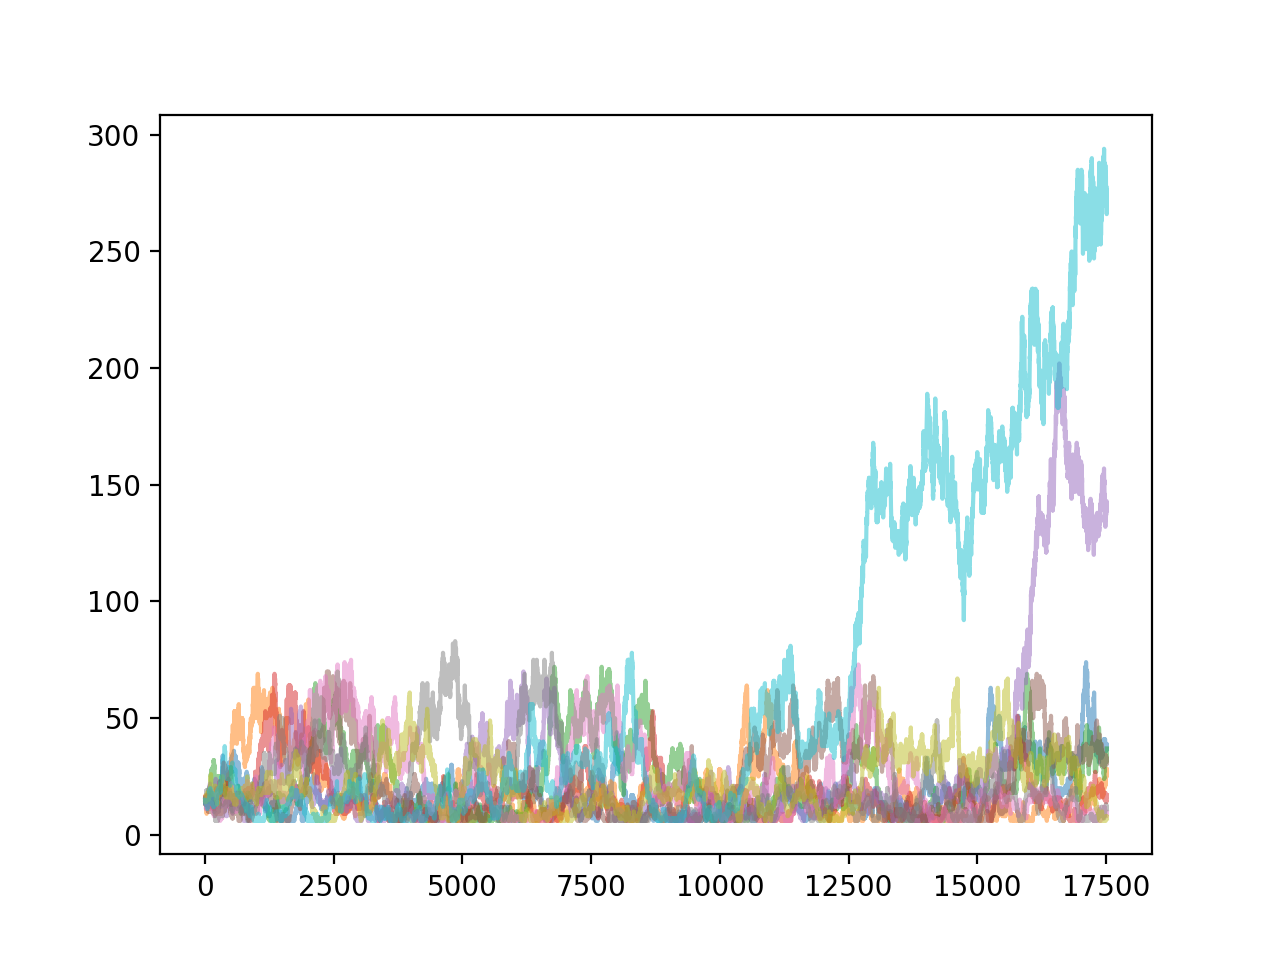

<AxesSubplot: >

In [70]:
df.plot(legend=None,alpha=0.5)

# Scratch Work

In [60]:
# die roll simulation to learn pandas

data = []                      # Step 1, empty list `data`
for i in range(600):           # Step 2: for-loop
  roll = random.randint(1, 6)  # Step 3: simulate real-world factors
  d = { "roll": roll }         # Step 4: accumulate factors in dictionary `d`
  data.append(d)               # Step 5: append `d` to `data`
my_df = pd.DataFrame(data)        # Step 6: create the DataFrame (outside of the for-loop)

In [61]:
my_df

,roll
0,1
1,2
2,1
3,4
4,5
...,...
595,6
596,3
597,4
598,1


In [62]:
# Step 1, empty list `data`:
data = []

# Step 2: for-loop:
for i in range(600):
  # Step 3: simulate all real-world factors:
  black = random.randint(1, 6)  
  white = random.randint(1, 6)

  # Step 4: accumulate all factors in dictionary `d`:
  d = { "white": white, "black": black }

  # Step 5: append `d` to `data`
  data.append(d)

# Step 6: create the DataFrame (outside of the for-loop)
my_df2 = pd.DataFrame(data)

In [63]:
my_df2

,white,black
0,1,4
1,3,4
2,1,1
3,2,4
4,2,4
...,...,...
595,3,6
596,4,1
597,4,5
598,6,4
